# Modele CNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Paramètres
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
DATASET_PATH = "/content/drive/MyDrive/Projet-ML/dataset_corrige_animals"

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.3,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 543 files belonging to 2 classes.
Using 381 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.3,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 543 files belonging to 2 classes.
Using 162 files for validation.


# Affichage de quelques images du training set

Classes détectées : ['injured_animals', 'not_injured_animals']


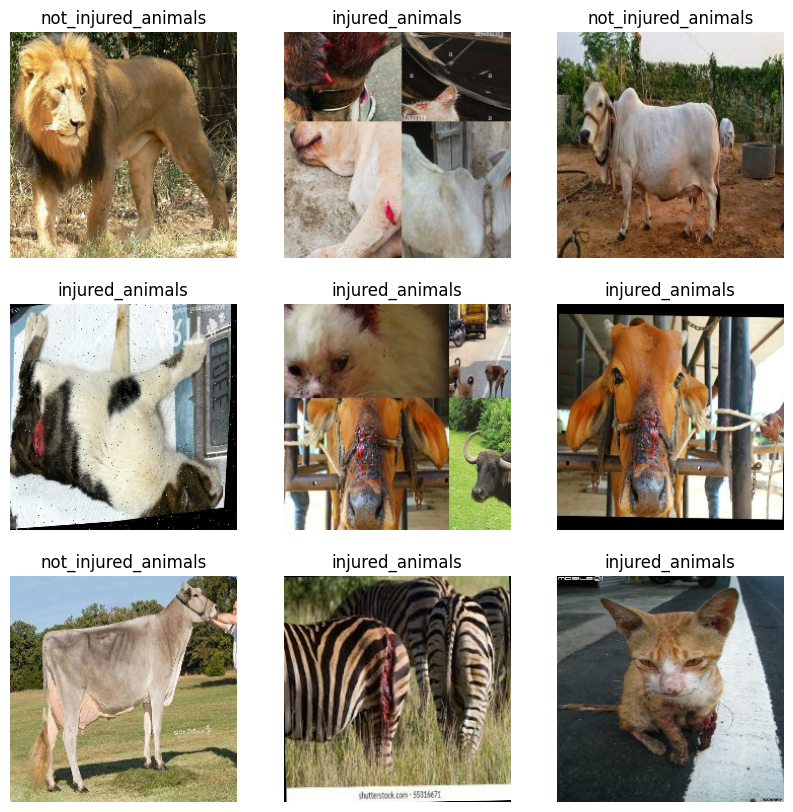

In [ ]:
class_names = train_ds.class_names
print("Classes détectées :", class_names)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Création du modèle CNN

In [ ]:
from tensorflow.keras import layers, models

def build_simple_cnn(input_shape):
    model = models.Sequential([
        layers.Rescaling(1./255, input_shape=input_shape),

        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(),

        layers.Dropout(0.5),
        layers.Flatten(),

        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Résumé du modèle

In [ ]:
input_shape = (224, 224, 3)
model_simple_cnn = build_simple_cnn(input_shape)

model_simple_cnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,631,169 (21.48 MB)

 Trainable params: 5,631,169 (21.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# Entraînement

In [ ]:
history = model_simple_cnn.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 67s 5s/step - accuracy: 0.4929 - loss: 0.8785 - val_accuracy: 0.5988 - val_loss: 0.6895
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 66s 4s/step - accuracy: 0.5513 - loss: 0.6900 - val_accuracy: 0.6173 - val_loss: 0.6687
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - accuracy: 0.6091 - loss: 0.6608 - val_accuracy: 0.6790 - val_loss: 0.6021
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.7336 - loss: 0.5388 - val_accuracy: 0.6049 - val_loss: 0.6536
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.7442 - loss: 0.5105 - val_accuracy: 0.6420 - val_loss: 0.8041
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.7683 - loss: 0.4544 - val_accuracy: 0.6358 - val_loss: 0.6420
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.8460 - loss: 0.3386 - val_accuracy: 0.6605 - val_loss: 0.9142
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.8684 - loss: 0.3291 - val_accuracy: 0.6235 - val_loss:

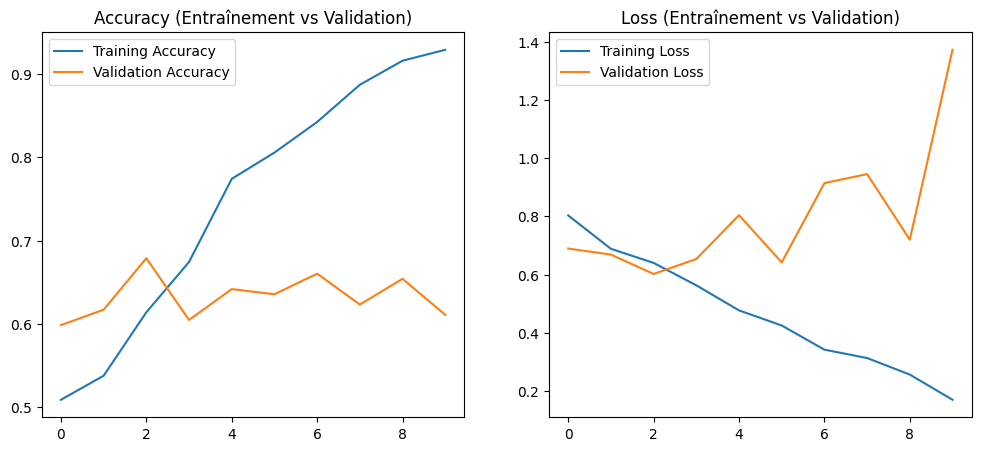

In [ ]:
import matplotlib.pyplot as plt

def plot_learning_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.title('Accuracy (Entraînement vs Validation)')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title('Loss (Entraînement vs Validation)')
    plt.legend()

    plt.show()

# Utilisation après l'entraînement :
plot_learning_curves(history)

In [ ]:
model_simple_cnn.save("Aminata_CNN.h5")